<a href="https://colab.research.google.com/github/JesusCab/Data-Mining-Python/blob/main/DataMiningTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Mineria De Datos - Jesus Adrian Caballero Nagaya**

1.- Adquisición de datos

2.- Limpieza de datos.

3.- Análisis de datos.

4.- Graficación.

5.- Prueba de hipótesis.

6.- Regresión lineal

7.- Predicciones


In [ ]:
import requests
import io
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List
import re
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

def get_soup(url: str) -> BeautifulSoup:
    response = requests.get(url)
    return BeautifulSoup(response.content, 'html.parser')

def get_csv_from_url(url:str) -> pd.DataFrame:
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt='orgtbl'))


df = get_csv_from_url("https://raw.githubusercontent.com/JesusCab/Data-Mining-Python/main/Car_Prices_Poland_Kaggle.csv")
df.head(500)


,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
495,495,opel,antara,NaN,2008,295000,1991,Diesel,Żory,Śląskie,22900
496,496,opel,antara,NaN,2008,212000,1991,Diesel,Piła,Wielkopolskie,18900
497,497,opel,antara,NaN,2009,220122,1991,Diesel,Kraków,Małopolskie,26900
498,498,opel,antara,NaN,2008,172000,2405,Gasoline,Ostrówek,Łódzkie,29900


In [ ]:
price_table = df["price"]
price_table

0          35900
1          78501
2          27000
3          30800
4          35900
           ...  
117922    222790
117923    229900
117924    135000
117925    154500
117926    130000
Name: price, Length: 117927, dtype: int64

In [ ]:
gender_frame = pd.DataFrame(data=df['model'])
gender_frame

,model
0,combo
1,combo
2,combo
3,combo
4,combo
...,...
117922,xc-90
117923,xc-90
117924,xc-90
117925,xc-90


In [ ]:
gender_frame = pd.DataFrame(data=df['price'])
gender_frame 
x=max(price_table)
y=min(price_table)
z= df["price"].mean()
w=df["price"].median()
m = df["price"].mode()
r=df["price"].count()
s=df["price"].sum()
k=df["price"].kurtosis()
v=df["price"].var()
d=df["price"].std()
print("Max {0}\n Min {1}\n Promedio {2}\n Mediana {3}\n moda {4}\n Conteo {5}\n Suma {6}\n Kutosis {7}\n Varianza {8}\n Desviacion Estandar {9}\n".format(x,y,z,w,m,r,s,k,v,d))

Max 2399900
 Min 500
 Promedio 70299.88479313474
 Mediana 41900.0
 moda 0    19900
dtype: int64
 Conteo 117927
 Suma 8290254514
 Kutosis 25.390107966360222
 Varianza 7195208997.487975
 Desviacion Estandar 84824.57779139237



In [ ]:
g = df.groupby(['model','mark']).mean()
g

,,Unnamed: 0,year,mileage,vol_engine,price
model,mark,,,,,
147,alfa-romeo,80662.500,2004.750000,199146.218750,1743.937500,6929.531250
159,alfa-romeo,80774.500,2007.713542,222944.166667,1982.895833,17017.614583
2,mazda,97622.500,2011.075893,128518.066964,1411.049107,25803.669643
2008,peugeot,109254.500,2017.334821,63783.591518,1248.272321,68878.167411
206,peugeot,105718.500,2004.200000,178035.168750,1373.712500,6680.856250
...,...,...,...,...,...,...
xsara-picasso,citroen,84630.500,2005.500000,210990.906250,1689.718750,7785.395833
yaris,toyota,74086.500,2013.528125,109041.981250,1272.831250,38927.764583
yeti,skoda,80598.500,2012.604167,160701.468750,1603.093750,38448.010417


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


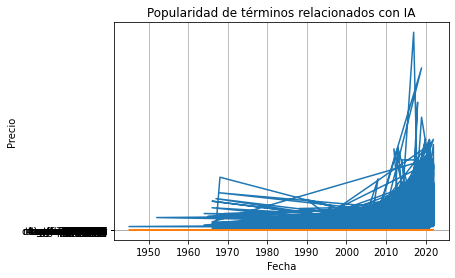

In [ ]:
plt.plot(df['year'], df['price'], label='price')
plt.plot(df['year'], df['model'], label='model')

plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Popularidad de términos relacionados con IA')
plt.grid(True)


In [ ]:
m = df['model']
m


0         combo
1         combo
2         combo
3         combo
4         combo
          ...  
117922    xc-90
117923    xc-90
117924    xc-90
117925    xc-90
117926    xc-90
Name: model, Length: 117927, dtype: object

<BarContainer object of 117927 artists>

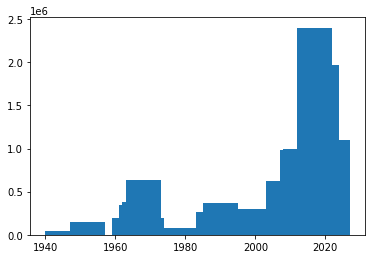

In [ ]:
plt.bar(df['year'], df['price'], width=10)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['model'], y=df['price']))

fig.update_layout(
    xaxis=dict(
        title_text='model',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text="price",
        
        titlefont=dict(size=30)
    ),
    title="acumuldado de dinero gastado por modelo de auto"
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['mark'], y=df['price']))

fig.update_layout(
    xaxis=dict(
        title_text='mark',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text="price",
        
        titlefont=dict(size=30)
    ),
    title="acumuldado de dinero gastado por marca de auto"
)

fig.show()

In [ ]:
year_table = df["year"]
year_table

0         2015
1         2018
2         2015
3         2016
4         2014
          ... 
117922    2020
117923    2017
117924    2016
117925    2017
117926    2016
Name: year, Length: 117927, dtype: int64

In [ ]:
mileage_table = df["mileage"]
df["mileage"]

0         139568
1          31991
2         278437
3          47600
4         103000
           ...  
117922     40000
117923     51000
117924     83500
117925    174000
117926    189020
Name: mileage, Length: 117927, dtype: int64

    index                          year        mileage
0       0 1970-01-01 00:00:00.000002015  135094.387145
1       1 1970-01-01 00:00:00.000002018   86806.593269
2       2 1970-01-01 00:00:00.000002016  119451.553055
3       3 1970-01-01 00:00:00.000002014  149283.361658
4       4 1970-01-01 00:00:00.000002017  104421.368279
5       5 1970-01-01 00:00:00.000002012  173283.514583
6       6 1970-01-01 00:00:00.000001998  243071.114815
7       7 1970-01-01 00:00:00.000001999  249658.918519
8       8 1970-01-01 00:00:00.000002001  239231.291942
9       9 1970-01-01 00:00:00.000002000  238477.478431
10     10 1970-01-01 00:00:00.000002002  227814.580328
11     11 1970-01-01 00:00:00.000001996  240334.030303
12     12 1970-01-01 00:00:00.000001997  240515.324324
13     13 1970-01-01 00:00:00.000002004  231165.443014
14     14 1970-01-01 00:00:00.000002007  217060.740889
15     15 1970-01-01 00:00:00.000002008  208790.957414
16     16 1970-01-01 00:00:00.000002006  217875.807361
17     17 

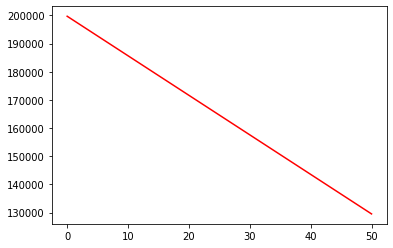

In [120]:
model = LinearRegression()
def Timestamp(position):    #Transforma las fechas a TimeStamp de pandas
    return pd.Timestamp(position)

#Agrupación de Fecha-Precio
datePrice = pd.DataFrame()
datePrice['year'] = df['year'].transform(Timestamp)
datePrice ['mileage']= df['mileage']
datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()
#print(datePrice)


#Regresion Lineal

regresion = LinearRegression()

low = datePrice['index'].values.reshape((-1,1))
modelo = regresion.fit(low, datePrice['mileage'])
entrada = [[0],[50]]
plt.plot(entrada, modelo.predict(entrada), color = 'red')



	Regresión Lineal


b =  199721.32917071646
m =  [-1403.54021535]
[199721.32917072 129544.31840318]
140976.78614736235


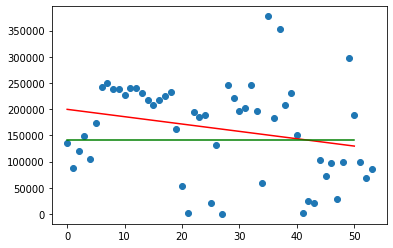

In [126]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import os

model = LinearRegression()
def Timestamp(position):    #Transforma las fechas a TimeStamp de pandas
    return pd.Timestamp(position)

df = get_csv_from_url("https://raw.githubusercontent.com/JesusCab/Data-Mining-Python/main/Car_Prices_Poland_Kaggle.csv")
df.head(500)
print("\n\tRegresión Lineal\n\n")


datePrice = pd.DataFrame()
datePrice['year'] = df['year'].transform(Timestamp)
datePrice ['mileage']= df['mileage']
datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()
#print(datePrice)

regresion = LinearRegression()

low = datePrice['index'].values.reshape((-1,1))
modelo = regresion.fit(low, datePrice['mileage'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)
entrada = [[0],[50]]
print(modelo.predict(entrada))
print(df['mileage'].mean())
meanLine = df['mileage'].mean()
meanLine = [[meanLine],[meanLine]]

plt.scatter(datePrice['index'], datePrice['mileage'])
plt.plot(entrada, modelo.predict(entrada), color = 'red')
plt.plot(entrada, meanLine, color = 'green')



	Regresión Lineal


        Unnamed: 0   mark  model    generation_name  year  mileage  \
0                0   opel  combo         gen-d-2011  2015   139568   
1                1   opel  combo         gen-d-2011  2018    31991   
2                2   opel  combo         gen-d-2011  2015   278437   
3                3   opel  combo         gen-d-2011  2016    47600   
4                4   opel  combo         gen-d-2011  2014   103000   
...            ...    ...    ...                ...   ...      ...   
117922      117922  volvo  xc-90  gen-ii-2014-xc-90  2020    40000   
117923      117923  volvo  xc-90  gen-ii-2014-xc-90  2017    51000   
117924      117924  volvo  xc-90  gen-ii-2014-xc-90  2016    83500   
117925      117925  volvo  xc-90  gen-ii-2014-xc-90  2017   174000   
117926      117926  volvo  xc-90  gen-ii-2014-xc-90  2016   189020   

        vol_engine      fuel              city       province   price  
0             1248    Diesel             Janki    Mazowieckie   35

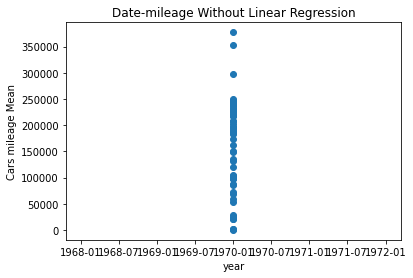

In [ ]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import os

model = LinearRegression()
def Timestamp(position):    #Transforma las fechas a TimeStamp de pandas
    return pd.Timestamp(position)

df = get_csv_from_url("https://raw.githubusercontent.com/JesusCab/Data-Mining-Python/main/Car_Prices_Poland_Kaggle.csv")
df.head(500)
print("\n\tRegresión Lineal\n\n")
print(df)

#Agrupación de Fecha-Precio
datePrice = pd.DataFrame()
datePrice['year'] = df['year'].transform(Timestamp)
datePrice ['mileage']= df['mileage']
#print(datePrice) 
datePrice = datePrice.groupby(pd.Grouper(key='year')).mean().reset_index()
datePrice=datePrice.reset_index()
#print(datePrice)


#Regresion Lineal

regresion = LinearRegression()

low = datePrice['index'].values.reshape((-1,1))
modelo = regresion.fit(low, datePrice['mileage'])
#print("b = ", modelo.intercept_)
#print("m = ", modelo.coef_)
entrada = [[0],[50]]
#print(modelo.predict(entrada))
#print(df['mileage'].mean())
meanLine = df['mileage'].mean()
meanLine = [[meanLine],[meanLine]]


#Plot
plt.scatter(datePrice['index'], datePrice['mileage'])
plt.plot(entrada, modelo.predict(entrada), color = 'red')
#plt.plot(entrada, meanLine, color = 'green')

plt.title("Linear Regression Date-mileage")
plt.xlabel("Date (index = year, Starting in 1970, Ends in 2021)")
plt.ylabel("Cars Prices Mean")
plt.xticks(datePrice['index'].to_numpy(), datePrice['year'].to_numpy())
plt.xticks(rotation=90)
plt.savefig("Linear Regression Date-mileage.png", bbox_inches="tight")
plt.close()

plt.scatter(datePrice['year'], datePrice['mileage'])
plt.title("Date-mileage Without Linear Regression")
plt.xlabel("year")
plt.ylabel("Cars mileage Mean")
plt.savefig("Date-mileage Without Linear Regression.png", bbox_inches="tight")